# Projet Commando : La Machine à Inventer des Mots (La MIM)


## Contexte

Il va s'agir ici de créer des mots nouveaux. Le principe est le suivant : on analayse une base de donnée de plusieurs milliers de mots. On étudie les enchainements de lettre les plus fréquents. De par cette observation, on crée alors des mots qui pourraient presque faire partit de notre dictionnaire. Libre à nous de lui associer une définition ! 

# Importation des Bibliothèques utiles pour ce projet

In [1]:
import  time

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from random import *
from pylab import *
import unicodedata
from math import *
import re
import unicodedata

In [3]:
# Petit rappel pour avoir le temps d'éxécution d'une cellule
start_time = time.time()
# Insérer code entre ces deux lignes
print("Temps d execution : %s secondes ---" % (time.time() - start_time))

Temps d execution : 5.3882598876953125e-05 secondes ---


# Importation des banques de mots

Nous travaillons avec 7 banques de mots de la langue française très diverses, de tailles variant de 835 à 411 430 mots, et 14 banques de mots d'autres langues utilisant l'alphabet latin. Certaines langues n'ont pas été sélectionnées, soit parce qu'elles nécessitaient la création d'un autre dictionnaire, soit parce que l'accès à une banque de mots de la langue était difficile.

In [4]:
################# IMPORTATION DES BANQUES #################


#Banque1: 835 mots, avec caractères spéciaux
file1=open(r"commun3.txt", "rt", encoding='utf_8')
file1=file1.readlines()


#Banque2: 1000 mots, sans caractères spéciaux 
file2=open(r"commun2.txt", "rt", encoding='utf_8')
file2=file2.readlines()


#Banque3: 1500 mots, avec caractères spéciaux
file3=open(r"commun4.txt", "rt", encoding='utf_8')
file3=file3.readlines()
#Une ligne du fichier comporte un mot, sa nature grammaticale et sa 'fréquence'. On ne sélectionne que les mots.
def filtrage1(fichier):
    tabl=[]
    for ligne in fichier:
        mot=u''
        lettre=ligne[0]
        ind=0
        while lettre!=' ':
            mot+=lettre
            ind+=1
            lettre=ligne[ind]
        tabl.append(mot)
    return tabl

file3=filtrage1(file3)


#Banque5 : 140K mots déclinés, avec caractères spéciaux
file5=open(r"banque140K.txt", "rt", encoding='utf_8')
file5=file5.readlines()


#Banque4: 140Kmots -> 74K mots, avec caractères spéciaux
file4=open(r"banque140Kbrute.txt","rt",encoding='utf_8')
file4=file4.readlines()
#Ce fichier de 140K mots est tiré de la Banque5. On a retiré la déclinaison de chaque mot de la banque5.
#Pour chaque déclinaison de 'avoir' par exemple, on obtiendra autant de mots 'avoir'.
#On supprime ces répétitions via la fonction suivante. et on obtient une banque de 74K mots.
def supprimerRep(fichier):
    tabl=[]
    tabl.append(fichier[0])
    for i in range(1,len(fichier)):
        if fichier[i-1]!=fichier[i]:
            tabl.append(fichier[i])
    return tabl
file4=supprimerRep(file5)

#Banque6: 300K mots, dont on remplace les caractères spéciaux par des caractères de l'alphabet
#Les accents de cette banque sont mal lus par Python, quelle que soit la méthode utilisée.
#Nous avons donc décidé de les remplacer par des caractères réguliers.
#Par exemple, 'é' devient 'e'.
def supAccent(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')
file6=[]
with open(r"mots.txt", "rt", encoding='utf_8') as ligne:
    for lettre in ligne:
        lettre=supAccent(lettre)
        file6.append(lettre)


#Banque7: 400K mots, sans accents
file7=[]
with open(r"dico3.txt", "rt", encoding='utf_8') as ligne:
    for lettre in ligne:
        lettre=lettre.lower() #les mots de cette banque sont tous en majuscule
        file7.append(lettre)
    

#Banque8: 200K mots anglais
file8=open(r"english.txt", "rt", encoding='utf_8')
file8=file8.readlines()

#Banque9: 60K mots italiens
file9=open(r"italian.txt", "rt", encoding='utf_8')
file9=file9.readlines()

#Banque10: 180K mots néerlandais
file10=open(r"nederlands.txt", "rt", encoding='utf_8')
file10=file10.readlines()

#les mots des banques suivantes sont accompagnées de leur fréquence, on applique le filtrage1 dessus pour ne sélectionner
#que les mots.

#Banque 11: 10K mots afrikaans
file11=open(r"afrikaans.txt", "rt", encoding='utf_8')
file11=file11.readlines()
file11=filtrage1(file11) 

#Banque 12: 50K mots albanais
file12=open(r"albanian.txt", "rt", encoding='utf_8')
file12=file12.readlines()
file12=filtrage1(file12) 

#Banque 13: 50K mots catalans
file13=open(r"catalan.txt", "rt", encoding='utf_8')
file13=file13.readlines()
file13=filtrage1(file13) 

#Banque 14: 50K mots danois
file14=open(r"danish.txt", "rt", encoding='utf_8')
file14=file14.readlines()
file14=filtrage1(file14) 

#Banque15: 50K mots estoniens
file15=open(r"estonien.txt", "rt", encoding='utf_8')
file15=file15.readlines()
file15=filtrage1(file15) 

#Banque16: 50K mots finnois
file16=open(r"finnish.txt", "rt", encoding='utf_8')
file16=file16.readlines()
file16=filtrage1(file16) 

#Banque17: 50K mots norvégiens
file17=open(r"norwegian.txt", "rt", encoding='utf_8')
file17=file17.readlines()
file17=filtrage1(file17) 

#Banque18: 50K mots polonais
file18=open(r"polish.txt", "rt", encoding='utf_8')
file18=file18.readlines()
file18=filtrage1(file18) 

#Banque19: 50K mots portugais
file19=open(r"portuguese.txt", "rt", encoding='utf_8')
file19=file19.readlines()
file19=filtrage1(file19)

#Banque20: 50K mots serbes
file20=open(r"serbian.txt", "rt", encoding='utf_8')
file20=file20.readlines()
file20=filtrage1(file20)

#Banque21: 50K mots suédois
file21=open(r"swedish.txt", "rt", encoding='utf_8')
file21=file21.readlines()
file21=filtrage1(file21)

banques=[file1,file2,file3,file4,file5,file6,file7,file8,file9,file10,file11,file12,file13,file14,file15,file16,file17,file18,file19,file20,file21]


# Définition du dictionnaire de l'alphabet latin

Nous travaillons avec des listes de mots de l'alphabet latin. Cet alphabet est stocké comme dictionnaire Python, ce qui permet d'attribuer un numéro à chaque caractère de l'alphabet.

In [5]:
################# ALPHABET LATIN #################

def alphabetLatin():
    dictionnaire={}
    for i in range(97,123): #lettres de a à z
        dictionnaire[chr(i)]=i-97
    for i in range(224,254):
        dictionnaire[chr(i)]=i-198 #toutes les lettres accentuées
    del(dictionnaire['÷']) #il y a ce caractère sépcial au milieu des lettres accentuées
    return dictionnaire

alphabetLatin=alphabetLatin()
#alphabetLatin[a] renvoie 0

def alphabetInverse(dictionnaire):
    inverse = {}
    for cle in dictionnaire:
        valeur = dictionnaire[cle]
        inverse[valeur]=cle
    return inverse

alphabetLatinInverse=alphabetInverse(alphabetLatin)
#alphabetLatinInverse[0] renvoie a

alphabet=alphabetLatin

# Choix de la banque de mot avec laquelle travailler

In [6]:
#banques recommandées pour le français:
#file5 (140K mots, avec caractères accentués), file7 (400K mots, sans caractères accentués)
file = file7

#choisir l'alphabet avec lequel travailler:
alphabet = alphabetLatin
#c'est le seul disponible ici

################# ENLEVER \n A LA FIN DE LA BANQUE AVEC LAQUELLE ON TRAVAILLE #################

#Les mots de certaines listes contiennent un '\n' à la fin.
#On souhaite les supprimer pour que la taille d'une ligne soit égale à la taille de son mot dans la banque
#avec laquelle on travaille.
#Le programme retire également les caractères indisérés non présents dans notre alphabet.

def filtrage2(fichier,alphabet):
    nouvelleBanque=[]
    for mot in fichier:
        mot2=u''
        for lettre in mot:
            if lettre in alphabet:
                  mot2+=lettre
        if len(mot2)>0: #certaines lignes peuvent ne contenir qu'un caractère, et il peut ne pas être dans l'alphabet. 
            nouvelleBanque.append(mot2) #après filtrage, la ligne serait de longueur nulle. On ne la prend pas.
    return nouvelleBanque

file=filtrage2(file,alphabet)


In [7]:
####### ENLEVER \n A LA FIN DES MOTS DE CHAQUE BANQUE FRANCAISE ############################

#on le fait pour les banques en français. sert dans la partie statistiques, affichage et étude des matrices.

file1=filtrage2(file1,alphabetLatin)
file2=filtrage2(file2,alphabetLatin)
file3=filtrage2(file3,alphabetLatin)
file4=filtrage2(file4,alphabetLatin)
file5=filtrage2(file5,alphabetLatin)
file6=filtrage2(file6,alphabetLatin)
file7=filtrage2(file7,alphabetLatin)


files=[file1,file2,file3,file4,file5,file6,file7] #banques de mot en francais seulement ici, cette liste est utilisée
#en statistiques et pour l'affichage des matrices de probabilité

# Génération de mots

## Méthodes sans Markov

Génération de mots avec les probabilités d'enchainements de lettres, sans prendre en compte la position de la lettre dans le mot. Cette méthode est la reproduction et l'amélioration de la méthode utilisée par David Louapre de SCIENCESETONNANTES.

##### Si le message d'erreur 'probabilities do not sum to 1' apparaît, il suffit simplement de rééxécuter la cellule.

In [8]:

################# FONCTIONS CREANT LES MATRICES DE COMPTAGE #################

#Cas particulier pour la génération de la première lettre du mot : tableau (matrice 1D) d'occurences de chaque lettre 
#comme première lettre d'un mot du fichier

def matriceComptage1(file,alphabet):
    comptage=np.zeros(55) #le tableau où sera stocké les occurences de chaque lettre comme première lettre d'un mot du fichier
    comptageTot=0 #comptage total des premières lettres de mots
    for ligne in file: #On parcourt chaque mot du fichier
        lettre=ligne[0] #On cherche sa première lettre
        i=alphabet[lettre] #On cherche le numéro i associé à cette lettre
        comptage[i]+=1 
        comptageTot+=1 
    return comptage, comptageTot
#comptage[0] par exemple, compte le nombre de fois où la lettre 'a' est en tête d'un mot dans le fichier.


#Matrice de comptage 55 x 55 des enchaînements de deux lettres des mots du fichier
def matriceComptage2(file,alphabet):
    P=np.zeros((55,55)) #Matrices des enchaîenements de deux lettres
    comptageTot=np.zeros(55) #Tableau du nombre d'enchainements rencontrés commençant par une lettre donnée, pour chaque lettre
    for ligne in file: #On parcourt les mots du fichier
        placeLettre=0 #Variable qui nous donne la place de la lettre qu'on analyse
        for lettre in ligne: #On parcourt chaque lettre du mot 
            i=alphabet[lettre] #Numéro associé à la lettre analysée
            if placeLettre<len(ligne)-1: #Si on n'est pas en fin de mot
                lettreSuivante=ligne[placeLettre+1] #On regarde la lettre suivante
                j=alphabet[lettreSuivante] #On cherche le numéro associé à la lettre suivante 
                P[i][j]+=1 #On ajoute 1 à la case de la matrice correspondant à l'enchainement lettre-lettreSuivante
                comptageTot[i]+=1 #On ajoute 1 au comptage du nombre d'enchainements rencontrés pour la lettre lettre
            placeLettre+=1
    return P, comptageTot



#Matrice de comptage 55 x 55 x 55 des enchaînements de trois lettres des mots du fichier
#Même principe que la matrice précédente
def matriceComptage3(file,alphabet):
    P=np.zeros((55,55,55))
    comptageTot=np.zeros((55,55))
    for ligne in file:
        placeLettre=0 #place de la lettre analysée dans le mot
        for lettre in ligne:
            i=alphabet[lettre]
            if placeLettre<len(ligne)-2: #On vérifie que la lettre analysée est bien suivie de deux autres lettres
                lettreSuivante=ligne[placeLettre+1]
                lettreApres=ligne[placeLettre+2]
                j=alphabet[lettreSuivante]
                k=alphabet[lettreApres]
                P[i][j][k]+=1
                comptageTot[i][j]+=1
            placeLettre+=1
    return P, comptageTot



#Matrice de comptage d'enchaînements de deux lettres au début des mots du fichier
#On cherche les occurences de tous les enchaînements de deux lettres lorsque l'enchaînement est en tête de mot
def matriceComptageDebut(file,alphabet):
    P=np.zeros((55,55))
    comptageTot=np.zeros(55)
    for ligne in file:
        if len(ligne)>=2: #On vérifie que le mot a plus de deux caractères
            lettre1=ligne[0]
            lettre2=ligne[1]
            i=alphabet[lettre1]
            j=alphabet[lettre2]
            P[i][j]+=1
            comptageTot[i]+=1
    return P, comptageTot



#Matrice de comptage des enchaînements de deux lettres à la fin des mots du fichier
#On cherche les occurences de tous les enchaînements de deux lettres, lorsque l'enchaînement est en fin de mot
def matriceComptageFin(file,alphabet):
    P=np.zeros((55,55))
    comptageTot=np.zeros(55)
    for ligne in file:
        if len(ligne)>=2:
            lettre1=ligne[len(ligne)-2]#avant-dernière lettre du mot analysé
            lettre2=ligne[len(ligne)-1] #dernière lettre du mot analysé
            i=alphabet[lettre1]
            j=alphabet[lettre2]
            P[i][j]+=1
            comptageTot[i]+=1
    return P, comptageTot




################# FONCTIONS CREANT LES MATRICES DE PROBABILITES #################

#fonction transformant un tableau de comptage (matrice 1D) en tableau de probabilités 
#(ne sert que pour la génération de la première lettre du mot)
def probas(tab, comptageTot):
    for i in range(len(tab)):
        tab[i]=tab[i]/comptageTot
    return tab


#fonction transformant une matrice de comptage 2D en matrice de probabilités
def matriceProbas(M, comptageTot):
    for i in range(len(comptageTot)):
        if comptageTot[i]!=0:
            M[i]=M[i]/comptageTot[i]
    return M

#fonction transformant une matrice de comptage 3D (pour les enchaînements de 3 lettres) en matrice de probabilités
def matriceProbas2(M, comptageTot):
    for i in range(len(M)):
        for j in range(len(M[i])):
            if comptageTot[i][j]!=0:
                M[i][j]=(M[i][j])/(comptageTot[i][j])
    return M


################# VARIABLES #################

#conversion de l'alphabet en liste pour pouvoir utiliser np.random.choice dessus (utile dans la génération de mot)
#on rappelle que l'aphabet est un dictionnaire python
def conversionAlphabet(alphabet):
    tab=[]
    for lettre in alphabet:
        tab.append(lettre)
    return tab

alphabetConverti=conversionAlphabet(alphabet)

#MATRICES DE COMPTAGE

comptage1, comptageTot1=matriceComptage1(file,alphabet)

P, comptageTot=matriceComptage2(file,alphabet)

PPrime, comptageTotPrime=matriceComptage3(file, alphabet)

PDebut, comptageTotDebut=matriceComptageDebut(file,alphabet)

PFin, comptageTotFin=matriceComptageFin(file,alphabet)

#MATRICES DE PROBABILITES

tabProbas1=probas(comptage1, comptageTot1) #tableau de probailités de chaque lettre en tant que première lettre de mot

P=matriceProbas(P,comptageTot) #matrice 2D de probabilités des enchaînements de deux lettres

PDebut=matriceProbas(PDebut, comptageTotDebut) #matrice 2D de probabilités des enchaîenments de deux lettres en début de mot

PFin=matriceProbas(PFin, comptageTotFin) #matrice 2D de probabilités des enchainements de deux lettres en fin de mot

PPrime=matriceProbas2(PPrime, comptageTotPrime) #matrice 3D de probabilités des enchainements de trois lettres

################### GENERATION DE MOTS #####################

#Génération de la première lettre du mot
def genererlettre1():
    res=np.random.choice(alphabetConverti,1,p=tabProbas1) #sélectionne 1 lettre dans alphabetConverti avec des 
    return res #probabilités données dans tabProbas1
#note: np.random.choice renvoit un tableau  

#Génération d'un mot de longueur n avec la matrice de probas des enchainements de deux lettres
#attention n>=1
def genererMot2(n,alphabet):
    tab=genererlettre1() #on chosit une première lettre
    lettre=tab[0] 
    mot=lettre #on initialise notre mot à créer avec cette première lettre
    for i in range(1,n):
        noLettre=alphabet[lettre] #numéro de la lettre 
        choix=np.random.choice(alphabetConverti,1,p=P[noLettre]) #choix de la lettre suivante en fonction de la lettre précédente
        lettreSuivante=choix[0]
        mot+=lettreSuivante #on ajoute cette nouvelle lettre au mot
        lettre=lettreSuivante #la nouvelle lettre devient 'lettre' et on réitère le processus avec cette nouvelle lettre
    return mot


#Génération de mots par enchainement de deux lettres avec contrôle des enchaînements en tête et queue de mot
#Meme principe que le programme précédent
#attention n>=3
def genererMot2bis(n,alphabet):
    tab=genererlettre1() #on choisit une première lettre
    lettre=tab[0]
    mot=lettre
    ind=alphabet[lettre] #numéro de la lettre 
    tab=np.random.choice(alphabetConverti,1,p=PDebut[ind]) #on choisit la lettre suivante en fonction de la lettre précédente
    lettre=tab[0] #sachant qu'elle est en début de mot
    mot+=lettre
    for i in range(2,n-1):
        noLettre=alphabet[lettre]
        choix=np.random.choice(alphabetConverti,1,p=P[noLettre])
        lettreSuivante=choix[0]
        mot+=lettreSuivante
        lettre=lettreSuivante
    ind=alphabet[lettre] #numéro de l'avant-dernière lettre
    tab=np.random.choice(alphabetConverti,1,p=PFin[ind]) #choix de la dernière lettre en fonction de l'avant-dernière lettre
    lettreFinale=tab[0] #sachant qu'elle est en fin de mot
    mot+=lettreFinale
    return mot


#Génération de mots par enchainement de trois lettres
#n>=1
#mots sortis de longueur 2n-1
def genererMot3(n,alphabet):
    tab=genererlettre1() #on génère d'abord les deux premières lettres du mot comme dans genererMot2bis
    lettre=tab[0]
    mot=lettre
    noLettre=alphabet[lettre]
    choix=np.random.choice(alphabetConverti,1,p=P[noLettre])
    lettreSuivante=choix[0]
    mot+=lettreSuivante
    lettrePrecedente, lettre=lettre, lettreSuivante
    for i in range(2,n):
        noLettre=alphabet[lettre]
        noLettrePrecedente=alphabet[lettrePrecedente]
        choix=np.random.choice(alphabetConverti,1,p=PPrime[noLettrePrecedente][noLettre]) #choix de la lettre suivante en
        lettreSuivante=choix[0] #fonction des deux lettres précédentes
        mot+=lettreSuivante
        lettrePrecedente, lettre=lettre, lettreSuivante #on recommence le processus
    return mot

#génération de mots par enchainement de trois lettres avec contrôle des enchaînements en tête et queue de mot
#n>=3
#mots sortis de longueur 2n-1
def genererMot3bis(n,alphabet):
    tab=genererlettre1() #on choisit une première lettre
    lettre=tab[0]
    mot=lettre
    noLettre=alphabet[lettre] 
    tab=np.random.choice(alphabetConverti,1,p=PDebut[noLettre]) #on choisit la lettre suivante en fonction de la 
    lettreSuivante=tab[0]#lettre précédente sachant qu'elle est en début de mot
    mot+=lettreSuivante
    lettrePrecedente, lettre=lettre, lettreSuivante
    for i in range(2,n-1):
        noLettre=alphabet[lettre]
        noLettrePrecedente=alphabet[lettrePrecedente]
        choix=np.random.choice(alphabetConverti,1,p=PPrime[noLettrePrecedente][noLettre]) #choix de la lettre suivante en
        lettreSuivante=choix[0] #fonction des deux lettres précédentes
        mot+=lettreSuivante
        lettrePrecedente, lettre=lettre, lettreSuivante #on recommence le processus
    noLettre=alphabet[lettre]
    tab2=np.random.choice(alphabetConverti,1,p=PFin[noLettre]) #on choisit la dernière lettre en fonction de l'avant-dernière
    lettreFinale=tab2[0] #sachant qu'on est en fin de mot
    mot+=lettreFinale
    return mot

##################### VISIONNER LES RESULTATS #####################

def vision(n,nombremots,alphabet,nomduprogramme):
    sum=0
    print("génération de mot avec"+str(nomduprogramme))
    for i in range(nombremots):
        t0=time.time()
        mot=nomduprogramme(n,alphabet)
        tf=time.time()
        sum+=(tf-t0)
        print(mot)
    print("temps moyen de génération d'un mot:" +str(sum/nombremots)+"secondes" )

vision(10,10,alphabet,genererMot3bis)

génération de mot avec<function genererMot3bis at 0x7f8a64a74b90>
emardevela
passestera
rentriezai
propatesse
aboieraite
caveientit
embrogitte
ralisassio
mamillegns
emarlavoue
temps moyen de génération d'un mot:0.0010427713394165039secondes


## Méthodes avec Markov

Génération de mots avec des probabilités conditionnelles pour chaque lettre, en prenant en compte la position de la lettre dans le mot.
##### Si le message d'erreur 'probabilities do not sum to 1' apparaît, il suffit simplement de rééxécuter la cellule.

In [9]:
##################### MATRICES DE PROBABILITES P1, P2, ..., PplaceLettre, Pfin#####################

#création de la matrice de probabilité des enchainements de deux lettres lorsque la première lettre de
#l'enchainement est à la placeLettre-ième position d'un mot

def matriceProbaPosition1(file,placeLettre,alphabet):
    if placeLettre==0 : #cas particulier: tableau (matrice1D) de probas pour les lettres en 1ère place
        comptage1=np.zeros(55)
        comptageTot1=0
        for ligne in file: 
            l=ligne[0]  #on parcourt la première de chaque mot
            i=alphabet[l]
            comptage1[i]+=1 #on compte les différentes lettres 
            comptageTot1+=1 #on compte le nombre de lettres totales
        P=[comptage1[i]/comptageTot1 for i in range(0,55)] #normalisation
    else : 
        P=np.zeros((55,55))
        comptageTot=np.zeros(55)
        for ligne in file:
            if placeLettre<len(ligne)-1: 
                i=ligne[placeLettre-1] #lettre d'avant
                j=ligne[placeLettre] #lettre étudiée
                i=alphabet[i] #numéro associé à la lettre d'avant
                j=alphabet[j] #numéro associé à la lettre étudiée
                P[i][j]+=1 #on compte les lettres
                comptageTot[i]+=1 #on compte les lettres totales
        for i in range(len(comptageTot)):
            if comptageTot[i]!=0:
                P[i]=P[i]/comptageTot[i] #on convertit en probabilités
    return P


def matricesStockés(nombreDeLettres,file,alphabet): #cette fonction sert à ne pas recalculer les matrices pour chaque 
    Mstocks=[matriceProbaPosition1(file,i,alphabet) for i in range(nombreDeLettres-1)] #génération de mots
    Mstocks.append(PFin) #il faut prendre 
    return Mstocks #la matrice de la DERNIERE lettre et non celle qui correspond à la lettre à la place nombreDeLettres


#On essaye maintenant de combiner nos 2 méthodes les plus efficaces, on utilise le processus de chaine de markov
#avec des matrices prenant en compte les 2 lettres d'avant

def matriceProbaPosition2(file,placeLettre,mot,alphabet) :
    if placeLettre==0 or placeLettre==1 :
        M=matriceProbaPosition1(file, placeLettre,alphabet) #pour les deux premières lettres le code ne change pas, on peut
                                                               #on peut utiliser la fonction de matrice précédente
    else :
        M=np.zeros(55)
        comptageTot=0
        for ligne in file :
            if 0<placeLettre<len(ligne)-1 or placeLettre==-1 and 3<=len(ligne) :#je vérifie que je reste bien dans mon mot
                                    # la condition -1 sert lors de la matrice de la dernière lettre
                i=ligne[placeLettre-1] #lettre d'avant
                if i==mot[-1] : # je regarde si la lettre d'avant est égale à la dernière lettre actuelle de mon mot
                    j=ligne[placeLettre-2]
                    if j==mot[-2] : # de meme pour la lettre d'encore avant
                        lettre=ligne[placeLettre] 
                        k=alphabet[lettre] #numéro associé à la lettre analysée
                        M[k]+=1
                        comptageTot+=1
        if comptageTot !=0 :
            M=[M[i]/comptageTot for i in range(55)] #normalisation
    return M 


##################### GENERATION DE MOTS #####################

def genererMotMarkov1(nombreDeLettres,Mstocks):
    choix=np.random.choice(alphabetConverti,1,p=Mstocks[0]) #la 1ère lettre est hors de la boucle car 
    lettre=choix[0] #la Mstocks[0] n'a pas la meme dimension que les autres
    mot=lettre
    for i in range(1,nombreDeLettres):
        M=Mstocks[i] #matrice associée à la lettre en i-ème position
        ind=alphabet[lettre] #indice de la lettre précédente dans notre alphabet, nécessaire à notre matrice
        choix=np.random.choice(alphabetConverti,1,p=M[ind])
        lettreSuivante=choix[0]
        mot+=lettreSuivante # on ajoute la nouvelle lettre au mot
        lettre=lettreSuivante
    return mot
  


def genererMotMarkov2(file,nombreDeLettres,alphabet):
    lettre=np.random.choice(alphabetConverti,1,p=matriceProbaPosition2(file,0,[],alphabet))[0] 
    mot= lettre #1ère lettre
    ind=alphabet[lettre] #la 2ème lettre se génère comme dans genererMarkov1
    lettre=np.random.choice(alphabetConverti,1,p=matriceProbaPosition2(file,1,mot,alphabet)[ind])[0]
    mot+=lettre
    for i in range(2,nombreDeLettres-1 ) :
        M=matriceProbaPosition2(file,i,mot,alphabet) #On recalcule des matrices différentes ( en fait des listes) à chaque fois
        mot+=np.random.choice(alphabetConverti,1,p=M)[0]
    M=matriceProbaPosition2(file,-1,mot,alphabet) # on traite la dernière lettre à part
    mot+=np.random.choice(alphabetConverti,1,p=M)[0]
    return mot


##################### VISIONNER LES RESULTATS #####################

def visionMarkov1(n,nombremots,alphabet):
    sum=0
    Mstocks=matricesStockés(n,file,alphabet) #On génère toutes les matrices dont nous avons besoin,
                                             #ce sont les memes pour les mots de longueur identique
    print("génération de mots avec Markov1")
    for i in range(nombremots):
        t0=time.time()
        mot=genererMotMarkov1(n,Mstocks)
        tf=time.time()
        sum+=(tf-t0)
        print(mot)
    print("temps moyen de génération d'un mot:" +str(sum/nombremots)+"secondes" )

def visionMarkov2(n,nombremots,alphabet):
    sum=0
    print("génération de mots avec Markov2")
    for i in range(nombremots):
        t0=time.time()
        mot=genererMotMarkov2(file,n,alphabet)
        tf=time.time()
        sum+=(tf-t0)
        print(mot)
    print("temps moyen de génération d'un mot:" +str(sum/nombremots)+"secondes" )

visionMarkov1(10,10,alphabet)
visionMarkov2(10,10,alphabet)


génération de mots avec Markov1
bautterome
picancrata
dessociase
retergerer
sauromennt
pinoulorai
coufffenca
demaditere
suanaseles
bonfissent
temps moyen de génération d'un mot:0.0009603023529052735secondes
génération de mots avec Markov2
musairlais
trouterise
tirassates
remplionde
escarporme
mefrassais
reponnises
elivetencu
sesemerais
affouraphe
temps moyen de génération d'un mot:1.42208833694458secondes


# Statistiques sur la longueur des mots français, détermination de nrec et nmax

L'utilisateur peut maintenant générer des mots de longueur n grâce à nos programmes. On peut lui recomander une longueur nrec pour obtenir les meilleurs mots possibles, et définir une longueur nmax pour l'empêcher de créer des mots trops longs trop loins de ceux de la langue. nmax servirait aussi à limiter le nombre de matrices à calculer dans la méthode de Markov, dans laquelle il y a autant de matrices de probabilités à calculer qu'il y a de lettres dans le mot désiré.

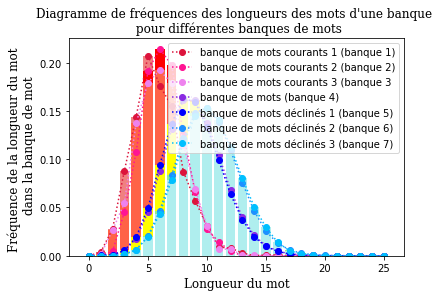

liste des longueurs moyennes des mots pour chaque banque de mots français:
[5.865865865865866, 6.294610778443113, 6.09233926128591, 8.951509701243095, 8.830581524100523, 10.078750780019615, 10.166268867121989]
calcul de nmax avec la première méthode:
[16, 12, 14, 25, 25, 25, 21]
calcul de nmax avec la deuxième méthode:
[12, 11, 11, 15, 15, 17, 17]


In [15]:
################# FONCTIONS #################

#Tableau des longueurs possibles des mots, jusqu'à la longueur 25
def funLongueurs():
    tableau=np.zeros(26)
    for i in range(len(tableau)):
        tableau[i]=i
    return tableau

#Tableau de répartition des longueurs des mots d'un fichier, jusqu'à la longueur 25
def répartitionLongueursPourcentage(fichier,alphabet):
    tableau=np.zeros(26)
    motsTot=0
    for ligne in fichier:
        tableau[len(ligne)]+=1 #On rappelle qu'un filtrage préalable a fait en sorte que len(ligne)=longueur du mot
        motsTot+=1
    tableau=tableau/motsTot
    return tableau

################# VARIABLES #################

longueurs=funLongueurs()

#Les trois premiers fichiers sont des banques de mots courants
longueurMotsCourants1=répartitionLongueursPourcentage(file1,alphabet)
longueurMotsCourants2=répartitionLongueursPourcentage(file2,alphabet)
longueurMotsCourants3=répartitionLongueursPourcentage(file3,alphabet)

#Le quatrième fichier est une banque de mots de la langue français, comme celle qu'on peut trouver dans un dictionnaire
longueurMots=répartitionLongueursPourcentage(file4,alphabet)

#Les derniers fichiers sont des banques de mots de la langue française exhaustives, où les mots sont déclinés
longueurMotsDeclines1=répartitionLongueursPourcentage(file5,alphabet)
longueurMotsDeclines2=répartitionLongueursPourcentage(file6,alphabet)
longueurMotsDeclines3=répartitionLongueursPourcentage(file7,alphabet)

listerépartitionsLongueursPourcentage=[longueurMotsCourants1,longueurMotsCourants2,longueurMotsCourants3,longueurMots,longueurMotsDeclines1,longueurMotsDeclines2,longueurMotsDeclines3]


################# TRACE COURBES ET BARRES #################

#ESTHETIQUE
#tableau de couleurs
colors = ['lightcoral','red','tomato','darkorange','yellow','lightgreen','paleturquoise','crimson','deeppink','violet','blueviolet','blue','dodgerblue','deepskyblue']

#nom des banques
noms=['courants 1 (banque 1)','courants 2 (banque 2)', 'courants 3 (banque 3', '(banque 4)', 'déclinés 1 (banque 5)', 'déclinés 2 (banque 6)', 'déclinés 3 (banque 7)']

#police
font = {'family': 'serif', 'color':  'black', 'weight': 'normal','size': 12}

#TRACE DES BARRES
ax = plt.subplot()
def barres(listerépartitions):
    ind=0
    for nombre in listerépartitions:
        plt.bar(longueurs,nombre, color=colors[ind])
        ind+=1

#TRACE DES COURBES DELIMITANT LES BARRES
x=longueurs

def courbes(listerépartitions):
    ind=0
    for i in range(len(listerépartitions)):
        y = [listerépartitions[i][j] for j in range((len(listerépartitions[i])))]
        plt.plot(x, y, "b:o", color=colors[ind+7],label='banque de mots ' + str(noms[ind]))
        plt.legend(loc='upper right')
        ind+=1

plt.xlabel("Longueur du mot", fontdict=font)
plt.ylabel("Fréquence de la longueur du mot \n dans la banque de mot", fontdict=font)
plt.title("Diagramme de fréquences des longueurs des mots d'une banque \n pour différentes banques de mots",fontdict=font)


################# EXECUTION ICI #################
barres(listerépartitionsLongueursPourcentage)
courbes(listerépartitionsLongueursPourcentage)
plt.show()

################# CALCUL DE NREC ET NMAX #################

#calcul de la longueur moyenne d'un mot d'une banque
def moyenneLongueurs(longueurs, poidsLongueurs): #poidsLongueurs est la liste de répartition brute des longueurs pour un fichier
    val=0
    tot=0
    for i in range(len(longueurs)):
        val+=longueurs[i]*poidsLongueurs[i]
        tot+=poidsLongueurs[i]
    return val/tot

#calcul de la longueur moyenne d'un mot d'une banque, et ce pour toutes les banques
def toutesMoyennes(listerépartitions):
    listeMoyennes=[]
    for i in range(len(listerépartitions)):
        listeMoyennes.append(moyenneLongueurs(longueurs,listerépartitions[i]))
    print("liste des longueurs moyennes des mots pour chaque banque de mots français:")
    return listeMoyennes


### CALCUL DE NMAX AVEC LA PREMIERE METHODE

#On définit nmax pour une banque comme la longueur du mot de longueur maximale de cette banque

#calcul de la longueur max d'un mot d'une banque
def longMax(longueurs, poidsLongueurs):
    val=0
    for i in range(len(longueurs)):
        if poidsLongueurs[i]!=0 and i>val:
            val=i
    return val

#calcul de la longueur max d'un mot d'une banque, et ce pour toutes les banques
def toutesLongMax(listerépartitions):
    listeLongMax=[]
    for i in range(len(listerépartitions)):
        listeLongMax.append(longMax(longueurs, listerépartitions[i]))
    print("calcul de nmax avec la première méthode:")
    return listeLongMax

### CALCUL DE NMAX AVEC LA DEUXIEME METHODE

alpha=0.02

#On cherche jusqu'à quelle longueur (1-alpha)*100% les mots d'une banque sont compris

def nmax(longueurs, poidsLongueurs):
    tot=0
    totSousSeuil=0
    for i in range(len(longueurs)):
        tot+=poidsLongueurs[i]
    i=0
    while totSousSeuil<1-alpha:
        totSousSeuil+=poidsLongueurs[i]/tot
        i+=1
    return i

def tousnmax(longueursMots):
    listenmax=[]
    for i in range(len(longueursMots)):
        listenmax.append(nmax(longueurs,longueursMots[i]))
    print("calcul de nmax avec la deuxième méthode:")
    return listenmax



#EXECUTION ICI

listeMoyennes=toutesMoyennes(listerépartitionsLongueursPourcentage)
print(listeMoyennes)

listeLongMax=toutesLongMax(listerépartitionsLongueursPourcentage)
print(listeLongMax)

listetousnmax=tousnmax(listerépartitionsLongueursPourcentage)
print(listetousnmax)


# Affichage des matrices de probabilités

Affichage sous forme de carte de couleur des différentes matrices de probabilités des différentes banques de mots. 
##### Attention, ce code n'est adapté qu'à l'étude des matrices des banques françaises. Pour étudier d'autres banques, il faut leur appliquer filtrage2 préalablement.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:84: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


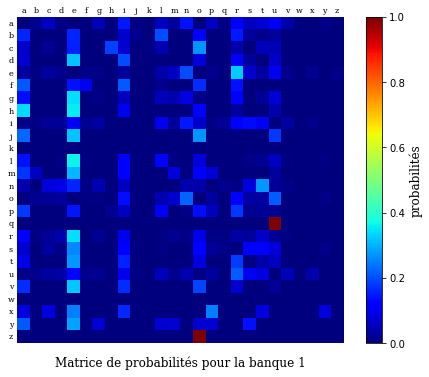

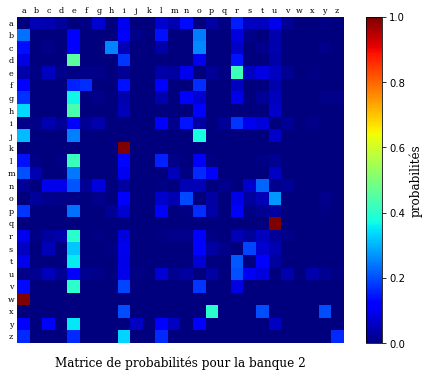

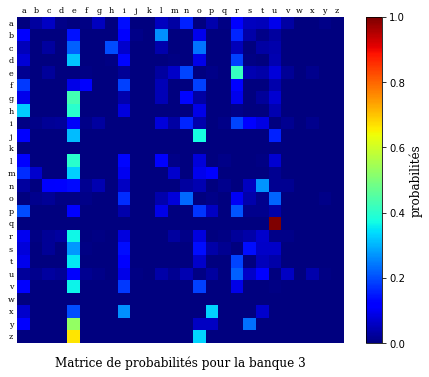

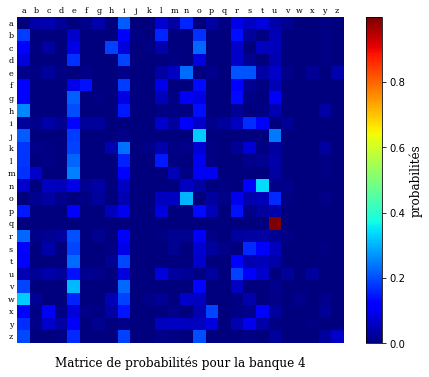

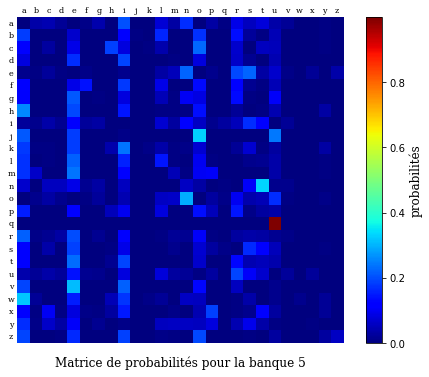

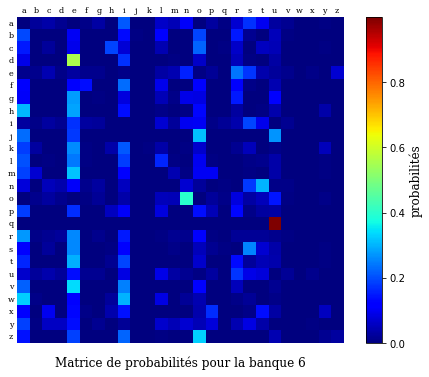

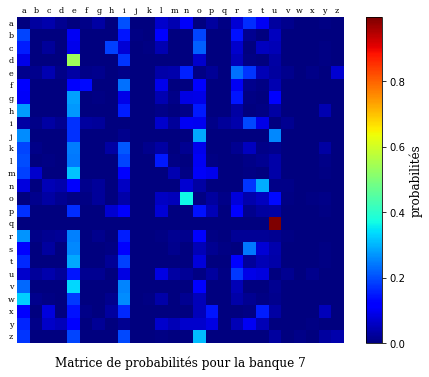

In [16]:
###################### VARIABLES ############################
#On recalcule certaines matrices, ce qui n'est pas forcément nécessaire.
#On n'utilise que les matrices 2D
#On stocke toutes ces matrices dans une liste

#MATRICES DE COMPTAGE
Pstock=[]
PDebutstock=[]
PFinstock=[]

for file in files:
    Pstock.append(matriceComptage2(file,alphabet))
    PDebutstock.append(matriceComptageDebut(file,alphabet))
    PFinstock.append(matriceComptageFin(file,alphabet))


#MATRICES DE PROBABILITES
PProbastock=[] #stockage des matrices de probabilités des enchainements de deux lettres en position quelconque
PDebutProbastock=[] #stockage des matrices de probabilités des enchainements de deux lettres en début de mot
PFinProbastock=[] #stockage des matrices de probabilités des enchainements de deux lettres en fin de mot

for element in Pstock:
    matrice=matriceProbas(element[0],element[1])
    PProbastock.append(matrice)

for element in PDebutstock:
    matrice=matriceProbas(element[0],element[1])
    PDebutProbastock.append(matrice)

for element in PFinstock:
    matrice=matriceProbas(element[0],element[1])
    PFinProbastock.append(matrice)


############################ VISIONNER TOUTES LES MATRICES D'UN STOCK ############################

#choix du stock de matrices à visualiser:
nomDuStock=PProbastock

#coefficient de contraste
contraste=0.5

#contraster les matrices
ContrasteeStock=[]

for matrice in nomDuStock:
    matriceContrastee=matrice**(contraste)
    ContrasteeStock.append(matriceContrastee)

#couper les matrices de A à Z (0 à 25)
CoupeStock=[]
for matrice in nomDuStock:
    CoupeStock.append(matrice[:26,:26])


#visualiser les matrices - aspect ésthétique
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

font2 = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 8,
        }

def visionMatrices(stock):
    noBanque=0
    for matrice in stock:
        noBanque+=1
        plt.figure(figsize=(8,6))
        plt.imshow(matrice, origin="upper", cmap='jet', interpolation='nearest')
        plt.axis('off')
        cbar=plt.colorbar()
        cbar.set_label('probabilités', fontdict=font)
        plt.title('Matrice de probabilités pour la banque ' + str(noBanque),fontdict=font,verticalalignment='bottom',y=-0.1)
        for i in range(97,123):
            plt.text(-1,i-97,chr(i),horizontalalignment='center',
                                    verticalalignment='center',fontdict=font2)
            plt.text(i-97,-1,chr(i),horizontalalignment='center',
                                    verticalalignment='center',fontdict=font2)
        if stock==nomDuStock: #les lettres accentuées sont inclusés
            for i in range(224,247):
                plt.text(-1,i-198,chr(i),horizontalalignment='center',
                                        verticalalignment='center',fontdict=font2)
                plt.text(i-198,-1,chr(i),horizontalalignment='center',
                                        verticalalignment='center',fontdict=font2)

            for i in range(248,254):
                plt.text(-1,i-199,chr(i),horizontalalignment='center',
                                        verticalalignment='center',fontdict=font2)
                plt.text(i-199,-1,chr(i),horizontalalignment='center',
                                        verticalalignment='center',fontdict=font2)
        #plt.savefig('Pcoupe2'+str(noBanque))

#utiliser CoupeStock si on veut visualiser les matrices de A à Z, sinon, utiliser nomDuStock!

############################ EXECUTION ICI ############################

visionMatrices(CoupeStock)
plt.show()


# Etude des matrices de probabilités

On peut aussi analyser le comportement des cases de ces matrices, en particulier, leur évolution en fonction de la taille des banques de mots. 
##### Attention, ce code n'est adapté qu'à l'étude des matrices des banques françaises. Pour étudier d'autres banques, il faut leur appliquer filtrage2 préalablement.

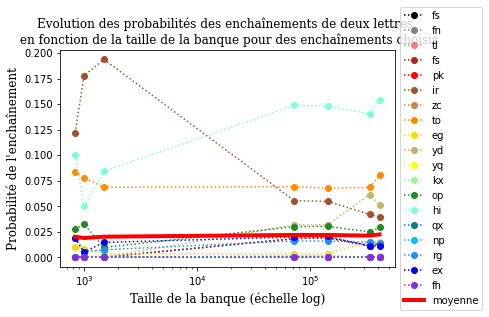

In [17]:
####################### GRAPHES D'ANALYSE ############################################
#étude de l'évolution des probabilités de certains enchainements de lettres en fonction de la taille de la banque

x = np.array([835, 1000, 1500, 72303, 142695, 336531, 411430])

#stock de matrices qu'on veut utiliser
nomDuStock2=PProbastock

#Liste des indices des enchainements de deux lettres dont on veut observer l'évolution

#combos choisies pour P
combosChoisies=[[0,8],[0,12],[0,13],[0,20],[1,17],[2,7],[4,5],[4,17],[4,18],[4,25], [6,4], [6,20], [7,4],[8,4],[11,4],[14,13],[17,4], [18,18],[25,0]]

#combos choisies pour PFin
combosChoisies2=[[4,5],[4,17],[4,18],[4,25]]

#au hasard
combosHasard=[[randint(0,26),randint(0,26)] for i in range(19)]

#esthétique
#couleurs
colors = ['black','gray','lightcoral','firebrick','red','sienna','peru','darkorange','gold','darkkhaki','yellow','palegreen','forestgreen','aquamarine','teal','deepskyblue','dodgerblue','blue','blueviolet','violet','deeppink']

#tracé des courbes
ax = plt.subplot()
def courbes(combos):
    ind=0
    for case in combos:
        y = [nomDuStock2[j][case[0]][case[1]] for j in range(len(nomDuStock2))]
        plt.plot(x, y, "b:o", color=colors[ind],label=str(chr(case[0]+97))+str(chr(case[1]+97)))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xscale('log')
        ind+=1


#courbe  moyenne d'évolution des probabilités
def moyenne(liste):
    val=0
    for i in range(len(liste)):
        val+=liste[i]
    return val/len(liste)

#calcul de la courbe pour toutes les matrices du stock
def moyennesCombos(combos):
    liste=[]
    for j in range(len(nomDuStock2)):
        listeProbas=[nomDuStock2[j][case[0]][case[1]] for case in combos]
        liste.append(moyenne(listeProbas))
    return liste

#tracé de la courbe
def courbeEvolutionMoyenne(combos):
    y = moyennesCombos(combos)
    plt.plot(x, y, color='red',label='moyenne',lw=4)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xscale('log')

plt.xlabel("Taille de la banque (échelle log)", fontdict=font)
plt.ylabel("Probabilité de l'enchaînement", fontdict=font)
plt.title("Evolution des probabilités des enchaînements de deux lettres \n en fonction de la taille de la banque pour des enchaînements choisis",fontdict=font)


############################ EXECUTION ICI ############################
courbes(combosHasard)
courbeEvolutionMoyenne(combosHasard)
plt.show()